# Laboratório 3 - Implementação do algoritmo evolução diferencial.
# Grupo: Douglas Ferrreira e Luiz Souza

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random as rd
import random

# Aqui são definidos o tamanho da populacao, N, a probabilidade de recombinacao, C, o fator de escala, F, e o número maximo de gerações, max_geracoes.

In [2]:
N = 100 #Tamanho populacao
C = 0.8 # prob de recombinacao
F =0.8 # fator de escala
max_geracoes = 80

# Uma populacao de tamanho N é gerado em um  determinado intervalo definido a priori.

In [3]:
def Population(intervalo):
    populacao = np.random.uniform(intervalo[0],intervalo[1],(N,2))
    return populacao

# Uma população mutante é Gerada. Cada indivíduo da população mutante poderá vir de 2 situações:  da população já existente ou ele será resultado da combinação de três indivíduos sorteados aleatoriamente. Quando a condição $if(\mu [0,1] \leq C \wedge i == \delta)$ é falsa acontece o primeiro caso e quando verdadeira o segundo.  Tradução da expressão acima: Quando um número aleatório de uma distribuição uniforme for menor ou igual a uma determinada probabilidade de recombinação(já definida) ou quando um número sorteado aleatoriamente dentro de uma faixa(intervalo com a quantidade de números igual a quantidade de variáveis de decisão) for igual ao índice da variável de decisão sendo analisada, é feita a recombinação de três indivíduos para formar um novo indivíduo mutante.

In [4]:
def GeraPopMutante(populacao,populacao_mutante):
    for j in range(N):
        indiv1, indiv2,indiv3 = SorteiaTres()
        mi = rd.uniform(0,1)
        delt = rd.randint(0,1)
        for i in range(2):
            if((mi<=C)or(delt==i)):
                populacao_mutante[j,i] = populacao[indiv1, i] +F*(populacao[indiv2, i] - populacao[indiv3, i])
            else:
                populacao_mutante[j,i]  = populacao[j,i]
    return populacao_mutante

#  No método abaixo, conforme a função escolhida, os indivíduos são substituídos ou não, de acordo com o fitness/valor da função objetivo dos indivíduos da população principal e da população mutante.

In [5]:
#Nessa funcao, caso os indivíduos mutantes tenham melhor fitness eles substituem os individuos da populacao principal
def SubstituiPopulacao(populacao, populacao_mutante):
    for i in range(N):
        if((Rastrigin(populacao_mutante[i]))<(Rastrigin(populacao[i]))):
            populacao[i] = populacao_mutante[i]
    return populacao

# Três indivíduos da população principal são sorteados aleatoriamente.

In [6]:
#Sao sorteados tres números aleatorios entre 0 e Tamanho da populacao para ser gerado um individuo mutante
def SorteiaTres():
    indiv1 = random.randint(0, N-1)
    indiv2 = random.randint(0,N-1)
    indiv3 = random.randint(0,N-1)
    return indiv1, indiv2, indiv3

# A função Rastrigin é definida

In [7]:
def Rastrigin(x):
    saida = (x[0]**2-10*np.cos(2*math.pi*x[0])) + (x[1]**2 -10*np.cos(2*math.pi*x[1]))
    return saida

# O melhor valor de função objetivo  e a média dos valores de função objetivo  são mostrados em cada geração

In [8]:
def plotar(valores_fitness, media_fitness):
    iteracoes = range(len(valores_fitness)) 
    fig, ax = plt.subplots( dpi=120 )
    ax.plot(iteracoes, valores_fitness,"#877009")
    ax.plot(iteracoes, valores_fitness,"m *", label=' Mínimo em cada Geração')
    ax.plot(iteracoes, media_fitness, "b.", label=' média do valor da função objetivo em cada Geração')
    #ax.set_xlabel('Gerações')
    ax.set_ylabel('Valor da função objetivo')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    #plt.title('\nNº de fitness em cada geração.') 
    plt.show()

# É retornado o ponto que tem o melhor mínimo das funções

In [9]:
def MelhorPonto(populacao):
    melhor_fitness =100
    for i in range(N):
        if(Rastrigin(populacao[i])<melhor_fitness):
            melhor_fitness = Rastrigin(populacao[i])
            ponto = populacao[i]
    return ponto
        


# Função principal, onde é feita a otimização da função Rastrigin


In [10]:
def main():
    print('\033[1m' +"Rastrigin")
    #Otimização da função Rastrigin

    populacao = Population([-2,2])
    populacao_mutante = np.zeros((N,2))
    valores_fit = []
    media_fitness = []
    for i in range(max_geracoes):
        populacao_mutante = GeraPopMutante(populacao,populacao_mutante)
        populacao = SubstituiPopulacao(populacao, populacao_mutante)
        melhor_ponto = MelhorPonto(populacao)
        valores_fit.append(Rastrigin(melhor_ponto))
        media_fitness.append(Rastrigin(np.mean(populacao, axis = 0)))
    plotar(valores_fit, media_fitness)  
    print("Ponto de mínimo final da função Rastrigin")
    print(((MelhorPonto(populacao)))) # Ponto bem próximo de [0,0]
            


# A função main é chamada aqui

Rastrigin


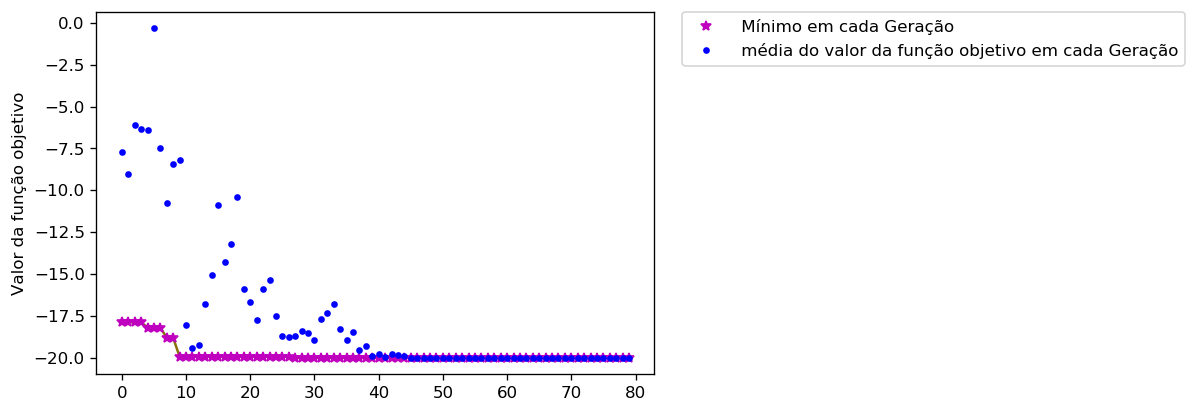

Ponto de mínimo final da função Rastrigin
[-3.41668050e-06  3.20304302e-06]


In [11]:
if __name__ == "__main__":
    main()